In [1]:
import scanpy as sc 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bbknn
import copy
import matplotlib.pyplot as plt
sc.settings.verbosity = 0 # 设置全局的waring数量，我这里直接不要求显示
sc.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg',dpi=400)

In [2]:
adata = sc.read_h5ad('../data/v4-total.h5ad')

# 超参数

In [3]:
np.unique(list(adata.obs.new_cls))

array(['End1', 'End2', 'End3', 'End4', 'End5', 'FLS1', 'FLS2', 'Fib1',
       'Fib2', 'Fib3', 'Macro1', 'Macro2', 'Macro3', 'T cells', 'VSMC1',
       'VSMC2', 'VSMC3'], dtype='<U7')

In [4]:
celltype_key = 'leiden_poly'  # obs中哪个存了注释的类
obs_key = 'sample_group' # adata.obs的column，你要哪哪个画比例，自动获取里面有几类
obs_sub_key = 'new_cls'
plot_respectively = 0#[['AF-1', 'AF-2', 'AF-3'],['NAF-1', 'NAF-2', 'NAF-3']] # 自己分好类
# or plot_respectively = 0

# 如果你的celltype超过5，这个就需要添加

In [5]:
c0 = np.array([181, 170, 210, 255]) / 255   # 紫
c1 = np.array([70,169,224,255]) / 255   # 蓝
c2 = np.array([163, 218, 202, 255]) / 255   # 绿
c3 = np.array([239,92,85,255]) / 255   # 红
c4 = np.array([255, 180, 160, 255]) / 255   # 橙
c5 = '#c4e693' # 黄
c6 = '#e378c2' # 玫红
c7 = '#8d564b' # 棕色

In [6]:
if obs_sub_key is None:
    mem = {}
    celltype = list(np.unique(adata.obs[celltype_key]))
    
    for val in list(np.unique(adata.obs[obs_key])):
        mem[val] = {}

    for k in mem.keys():
        for ct in celltype:
            mem[k][ct] = 0.0

    for ct in celltype:
        for k in mem.keys():
            tmp_total = adata[adata.obs[obs_key].isin([k])].shape[0]
            tmp_n =  adata[adata.obs[obs_key].isin([k])&adata.obs[celltype_key].isin([ct])].shape[0]
            mem[k][ct] = round(tmp_n/tmp_total * 100, 5)

    df_mem = pd.DataFrame(mem)
    df_mem = df_mem.sort_values(by=df_mem.columns[0],ascending=False)
    df = df_mem.T

    for i in range(1,df.shape[1]):
        df.iloc[:,i] += df.iloc[:,i-1]
    df = round(df,1)
else:
    df = adata.obs.groupby([celltype_key, obs_key, obs_sub_key]).count() 
    df = df[df.iloc[:,0]!=0]
    df = df[df.iloc[:,0]!=0]
    df = pd.DataFrame(df.iloc[:,0])
    df.columns = ['count']
    df_list = []
    
    celltype = list(np.unique(adata.obs[celltype_key]))
    mem_list = [{}]*len(celltype)
    
    for mem,ct in zip(mem_list,celltype):
        sct = np.unique(list(adata[adata.obs[celltype_key].isin([ct])].obs[obs_sub_key]))
        
        for val in list(np.unique(adata.obs[obs_key])):
            mem[val] = {}
  
        for k in mem.keys():
            for sct_ in sct:
                mem[k][sct_] = 0.0

        
        for sct_ in sct:
            for k in mem.keys():
                tmp_total = df.loc[ct,k].sum().item()
                tmp_n =  df.loc[ct, k, sct_].item()
                mem[k][sct_] = round(tmp_n/tmp_total * 100, 5)
   
        df_mem = pd.DataFrame(mem)
        df_mem = df_mem.sort_values(by=df_mem.columns[0],ascending=False)
        df

In [7]:
if obs_sub_key is None:
    mem = {}
    celltype = list(np.unique(adata.obs[celltype_key]))
    
    for val in list(np.unique(adata.obs[obs_key])):
        mem[val] = {}

    for k in mem.keys():
        for ct in celltype:
            mem[k][ct] = 0.0

    for ct in celltype:
        for k in mem.keys():
            tmp_total = adata[adata.obs[obs_key].isin([k])].shape[0]
            tmp_n =  adata[adata.obs[obs_key].isin([k])&adata.obs[celltype_key].isin([ct])].shape[0]
            mem[k][ct] = round(tmp_n/tmp_total * 100, 5)

    df_mem = pd.DataFrame(mem)
    df_mem = df_mem.sort_values(by=df_mem.columns[0],ascending=False)
    df = df_mem.T

    for i in range(1,df.shape[1]):
        df.iloc[:,i] += df.iloc[:,i-1]
    df = round(df,1)
else:
    df = adata.obs.groupby([celltype_key, obs_key, obs_sub_key]).count() 
    df = df[df.iloc[:,0]!=0]
    df = df[df.iloc[:,0]!=0]
    df = pd.DataFrame(df.iloc[:,0])
    df.columns = ['count']
    df_list = []
    
    celltype = list(np.unique(adata.obs[celltype_key]))
    mem_list = [{}]*len(celltype)
    
    for mem,ct in zip(mem_list,celltype):
        sct = np.unique(list(adata[adata.obs[celltype_key].isin([ct])].obs[obs_sub_key]))
        
        for val in list(np.unique(adata.obs[obs_key])):
            mem[val] = {}
  
        for k in mem.keys():
            for sct_ in sct:
                mem[k][sct_] = 0.0

        
        for sct_ in sct:
            for k in mem.keys():
                tmp_total = df.loc[ct,k].sum().item()
                tmp_n =  df.loc[ct, k, sct_].item()
                mem[k][sct_] = round(tmp_n/tmp_total * 100, 5)
   
        df_mem = pd.DataFrame(mem)
        df_mem = df_mem.sort_values(by=df_mem.columns[0],ascending=False)
        df_mem = df_mem.T
        
        for i in range(1,df_mem.shape[1]):
            df_mem.iloc[:,i] += df_mem.iloc[:,i-1]
        df_mem = round(df_mem,1)
        df_mem = df_mem.reindex(['NAF','AF'])
        df_list.append(df_mem)

        
        
        
    
    
    

In [8]:
df_mem

,VSMC1,VSMC2,VSMC3
NAF,44.1,90.2,100.0
AF,48.1,86.7,100.0


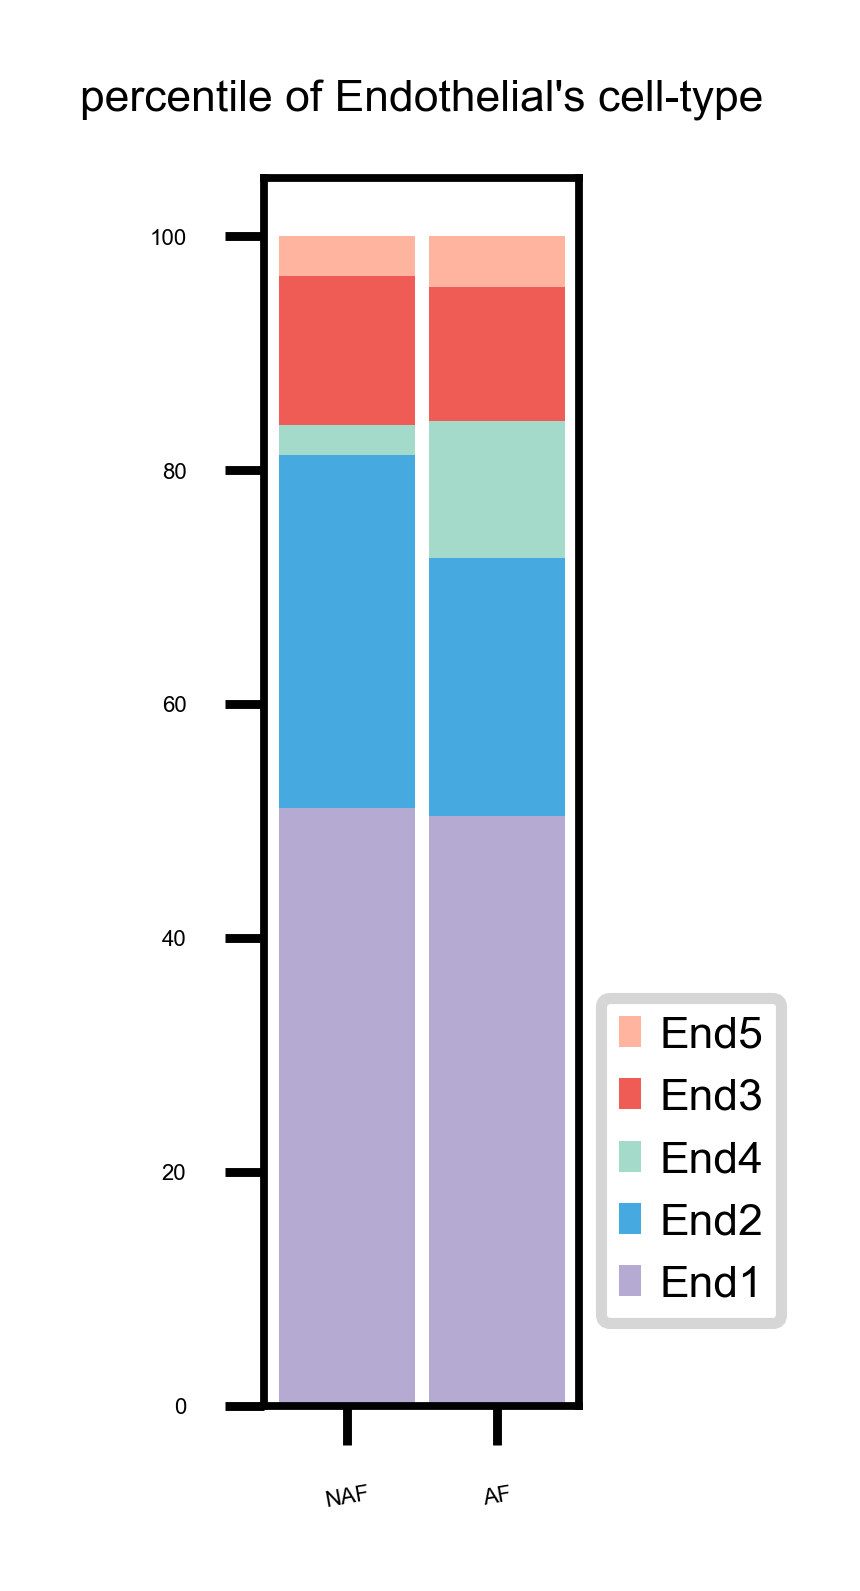

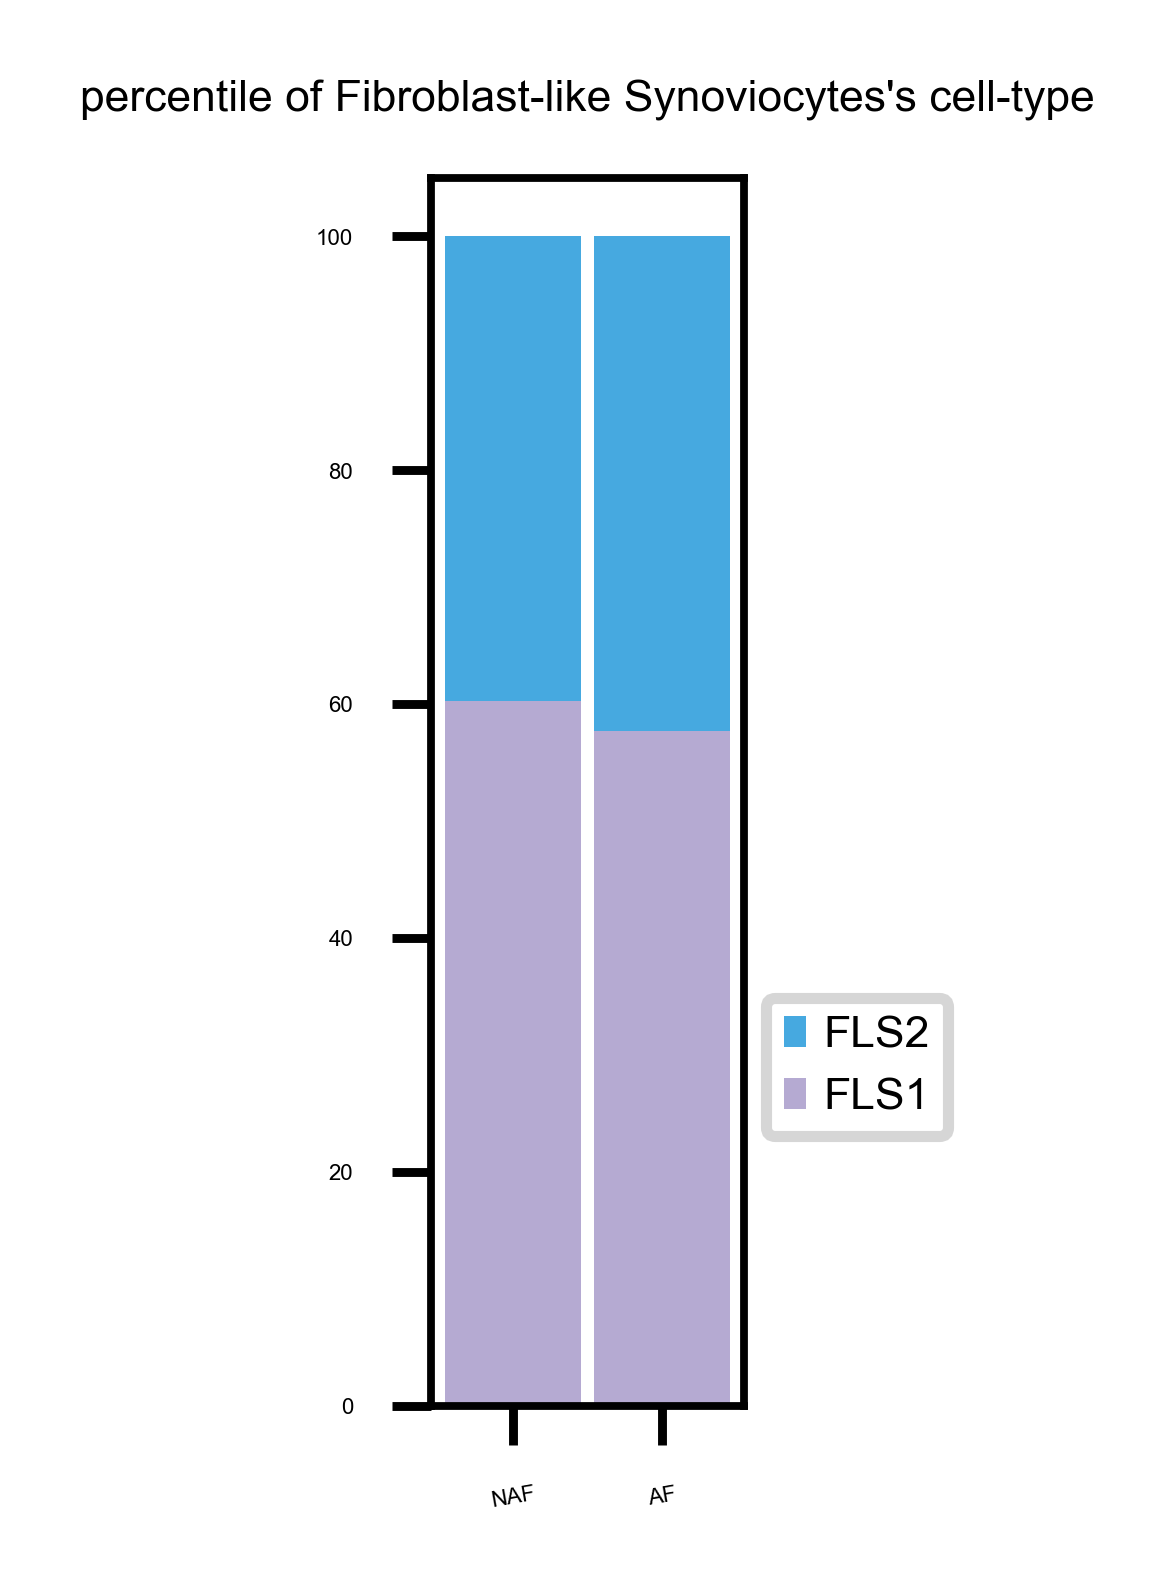

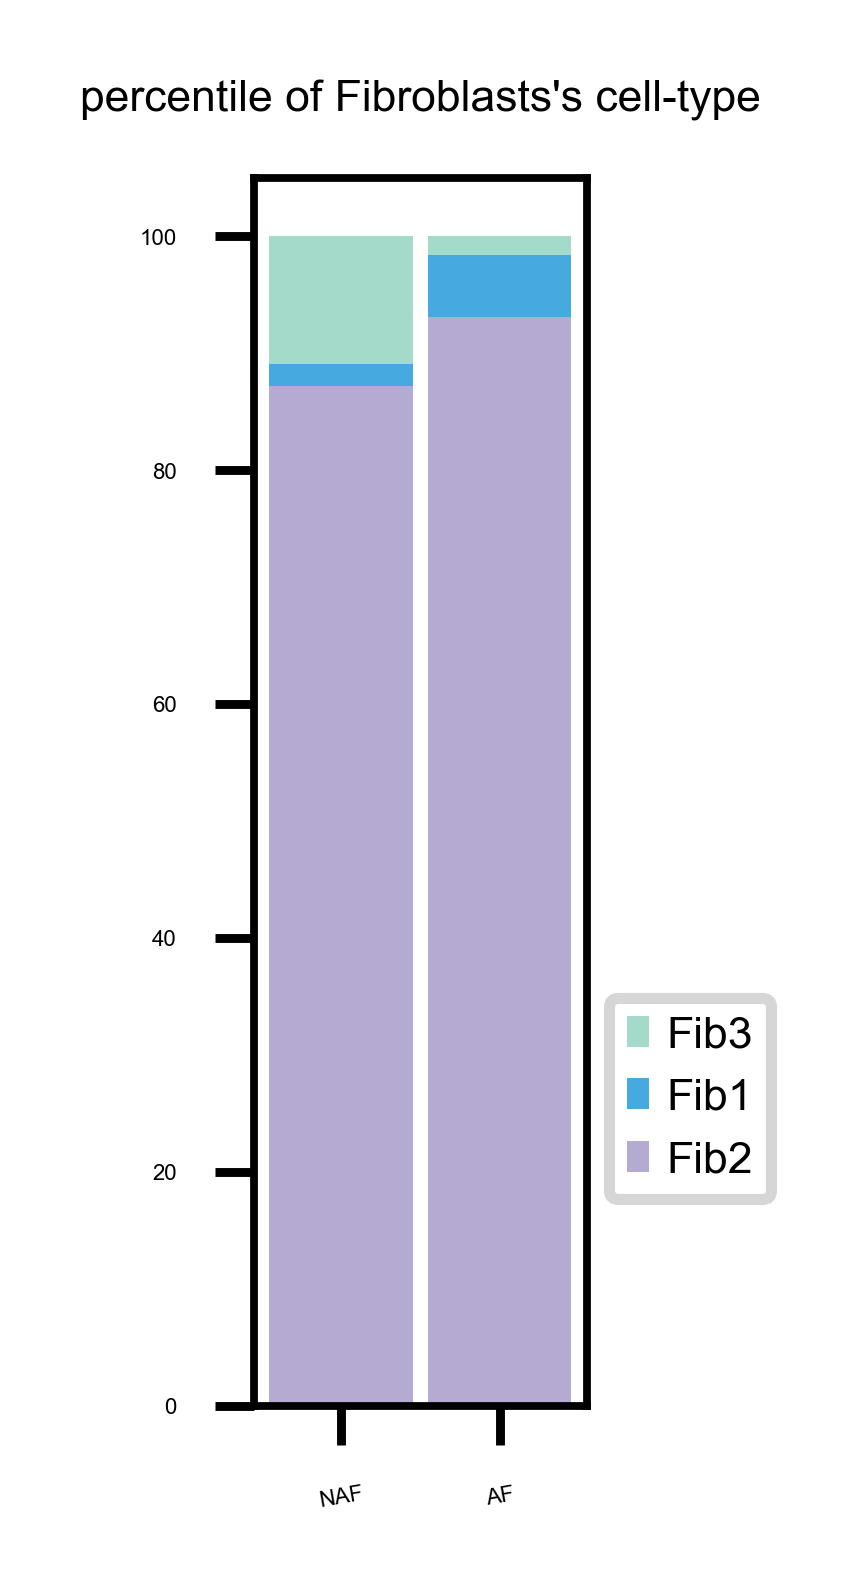

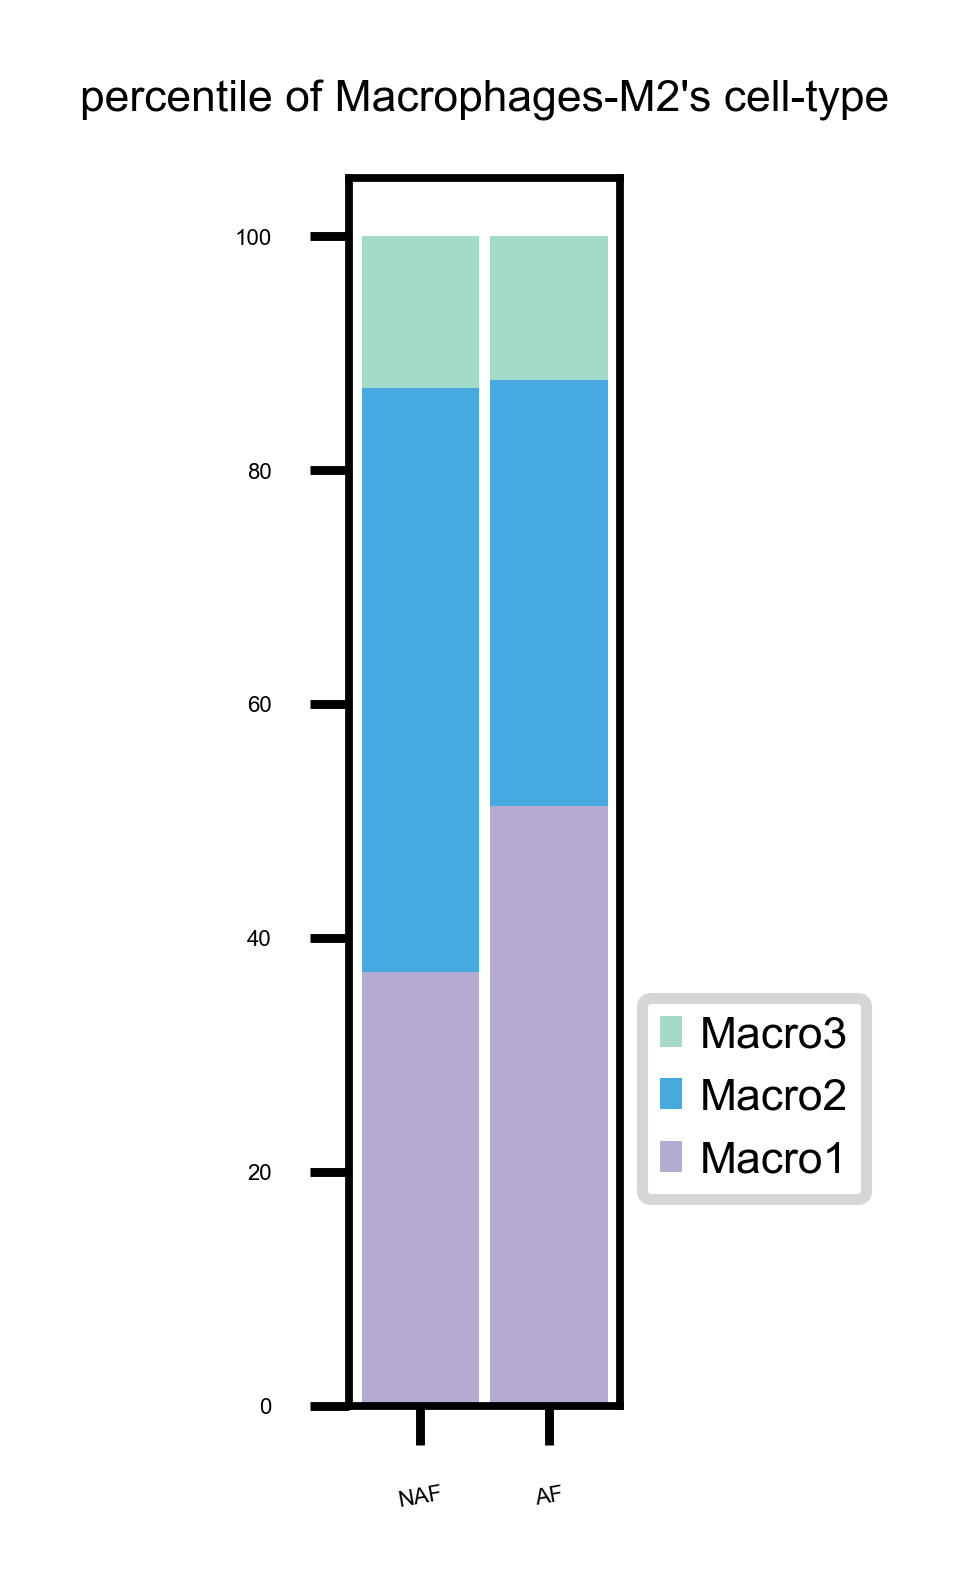

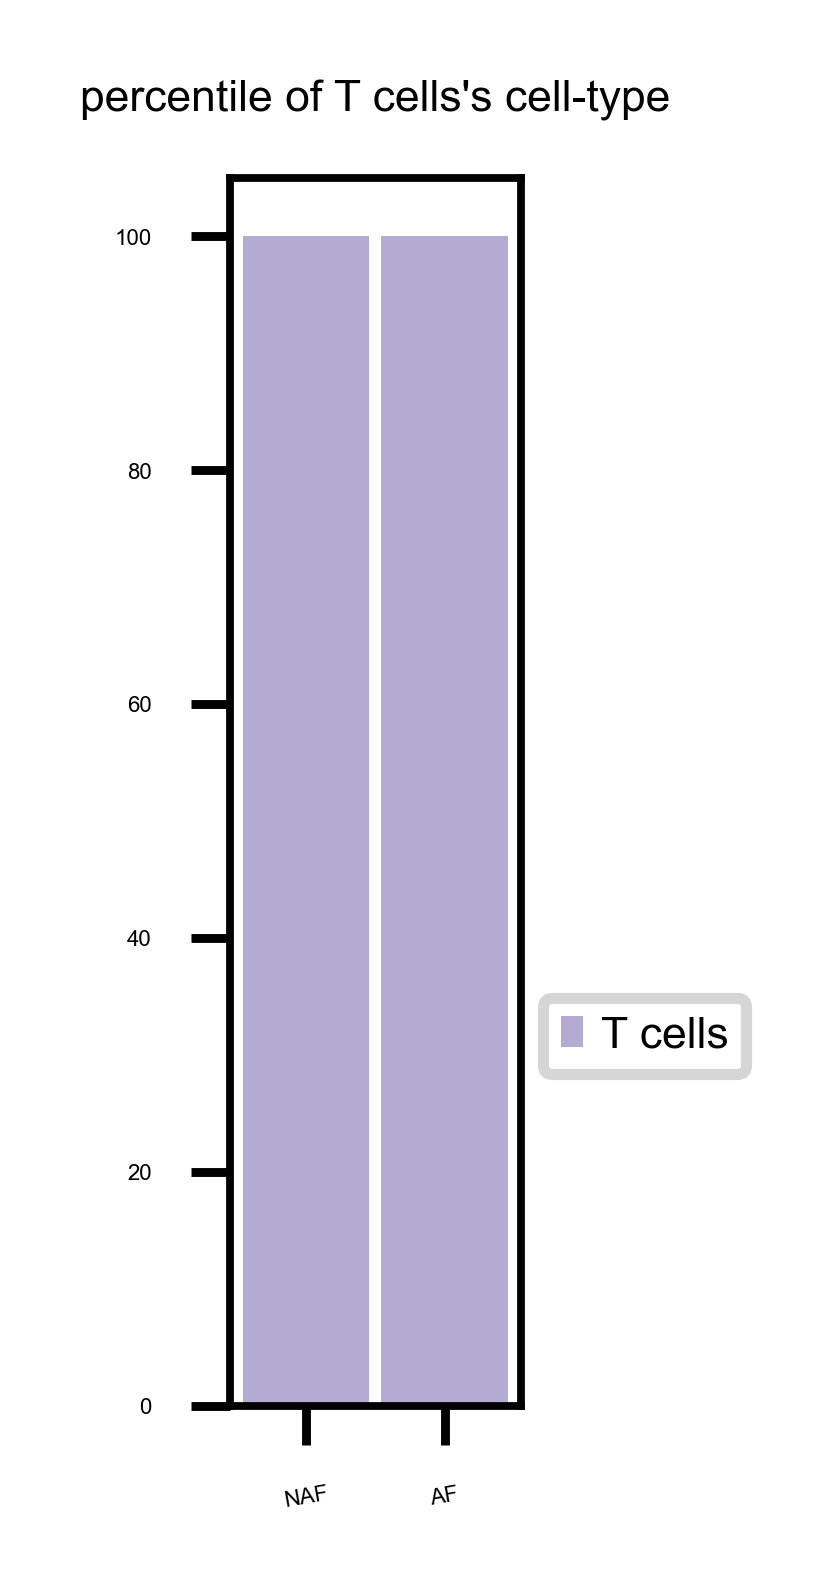

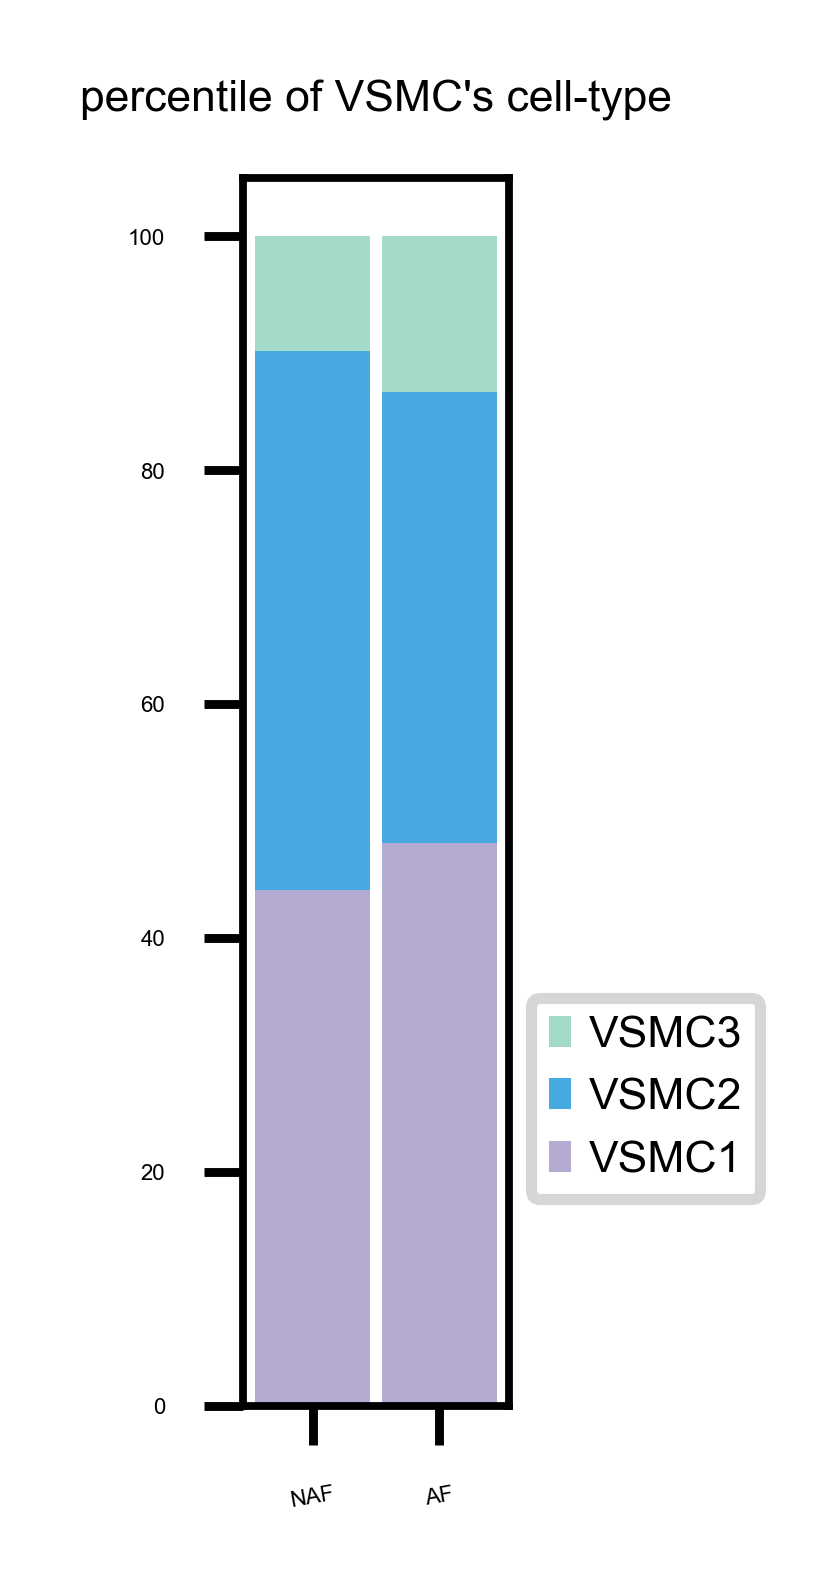

In [9]:
if plot_respectively:
    for divide in plot_respectively:
        tmp = df.loc[divide]
        plt.figure(figsize=(1,2))
        ax=plt.gca()
        x = [1 + 0.22 * i for i in range(tmp.shape[0])]
        for i in range(tmp.shape[0]):
            for j in range(tmp.shape[1]-1,-1,-1):
                exec('c=c{}'.format(j))
                plt.bar(x[i], tmp.iloc[i, j], width=0.2, color=c)

        plt.legend(tmp.columns[::-1],
                   bbox_to_anchor=(1.0,.35),loc='upper left', prop={'size':max(4, df.shape[0]//2)})
        plt.xticks(x,list(tmp.index), size=min(tmp.shape[0],3),rotation = 5 * tmp.shape[0])
        plt.yticks(size=max(tmp.shape[0],4))
        plt.grid()
        thick = max(1 - tmp.shape[0]/10, 0.2)
        ax.spines['bottom'].set_linewidth(thick );###设置底部坐标轴的粗细
        ax.spines['left'].set_linewidth(thick );####设置左边坐标轴的粗细
        ax.spines['right'].set_linewidth(thick );###设置右边坐标轴的粗细
        ax.spines['top'].set_linewidth(thick );###设置右边坐标轴的粗细
        plt.title('percentile of AF\'s cell-type',size=4)
        plt.tight_layout()
        # plt.savefig('./figures/cell_pertencile_AF.pdf',dpi=200, bbox_inches='tight')
        plt.show()    
        

    
else:
    if obs_sub_key is None:
        plt.figure(figsize=(1,2))
        ax=plt.gca()
        x = [1 + 0.22 * i for i in range(df.shape[0])]
        for i in range(df.shape[0]):
            for j in range(df.shape[1]-1,-1,-1):
                exec('c=c{}'.format(j))
                plt.bar(x[i], df.iloc[i, j], width=0.2, color=c)

        plt.legend(df.columns[::-1],
                   bbox_to_anchor=(1.0,.35),loc='upper left', prop={'size':max(4, df.shape[0]//2)})
        plt.xticks(x,list(df.index), size= min(df.shape[0],3),rotation = 5 * df.shape[0])
        plt.yticks(size= min(df.shape[0],3))
        plt.grid()
        thick = max( 1- df.shape[0]/10, 0.2) -0.1
        ax.spines['bottom'].set_linewidth(thick );###设置底部坐标轴的粗细
        ax.spines['left'].set_linewidth(thick );####设置左边坐标轴的粗细
        ax.spines['right'].set_linewidth(thick );###设置右边坐标轴的粗细
        ax.spines['top'].set_linewidth(thick );###设置右边坐标轴的粗细
        plt.title('percentile of AF\'s cell-type',size=4)
        plt.tight_layout()
        # plt.savefig('./figures/cell_pertencile_AF.pdf',dpi=200, bbox_inches='tight')
        plt.show()
    else:
        for df,ct in zip(df_list,celltype):
            plt.figure(figsize=(1,2))
            ax=plt.gca()
            x = [1 + 0.22 * i for i in range(df.shape[0])]
            for i in range(df.shape[0]):
                for j in range(df.shape[1]-1,-1,-1):
                    exec('c=c{}'.format(j))
                    plt.bar(x[i], df.iloc[i, j], width=0.2, color=c)

            plt.legend(df.columns[::-1],
                       bbox_to_anchor=(1.0,.35),loc='upper left', prop={'size':max(4, df.shape[0]//2)})
            plt.xticks(x,list(df.index), size= min(df.shape[0],3),rotation = 5 * df.shape[0])
            plt.yticks(size= min(df.shape[0],3))
            plt.grid()
            thick = max( 1- df.shape[0]/10, 0.2) -0.1
            ax.spines['bottom'].set_linewidth(thick );###设置底部坐标轴的粗细
            ax.spines['left'].set_linewidth(thick );####设置左边坐标轴的粗细
            ax.spines['right'].set_linewidth(thick );###设置右边坐标轴的粗细
            ax.spines['top'].set_linewidth(thick );###设置右边坐标轴的粗细
            plt.title('percentile of {}\'s cell-type'.format(ct),size=4)
            plt.tight_layout()
            plt.savefig('./figures/cell_pertencile_{}.pdf'.format(ct),dpi=200, bbox_inches='tight')
            plt.show()
            plt.close()